# 5.1.4a Curvas PR

**Propósito:** $\;$ estudiar $\,\hat{y}_{\tau}(\boldsymbol{x})=\mathbb{I}(p(y=1\mid\boldsymbol{x})\geq 1-\tau)\,$ en función de $\,\tau\,$ y con especial atención a positivos ya que la noción de "negativo" no está bien definida

**Ejemplos:** $\;$ casos en los que los negativos son resultado de un algoritmo, no parte de la definición del problema
* **Detección de objetos en visión con patches:** $\;$ el número de negativos depende del total de patches examinados
* **Recuperación de información:** $\;$ el número de negativos (documentos irrelevantes) depende del total de documentos recuperados

**Precisión:** $\;$ fracción de positivos predichos que son verdad
$$\mathcal{P}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FP}_{\tau}}%
=\frac{\operatorname{TP}_{\tau}}{\hat{P}_{\tau}}=\operatorname{PPV}_{\tau}$$

**Recall (cobertura):** $\;$ fracción de positivos de verdad que son predichos
$$\mathcal{R}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FN}_{\tau}}%
=\frac{\operatorname{TP}_{\tau}}{P}=\operatorname{TPR}_{\tau}$$

**Curva precision-recall (PR):** $\;$ gráfica de $\mathcal{P}(\tau)$ en función de $\mathcal{R}(\tau)$, obtenida al variar $\tau$ de $0$ a $1$

**Curvas PR típicas:** $\;$ de dos clasificadores, A y B, siendo el A claramente mejor que el B
* **$\tau=0\,$ (esquina superior izquierda):** $\;$ asumiendo que se predice algún positivo, es de esperar una precisión alta y cobertura baja
* **$\tau=1\,$ (esquina inferior derecha):** $\;$ precisión mínima, $\,P/M\,$ (próxima a $0$), y cobertura $1$ 
* **$0<\tau<1$:** curvas **aproximadamente** decrecientes por encima de la recta horizontal que exhibe un clasificador aleatorio
    * Aproximadamente derecientes: $\;$ si $\tau'\leq\tau$, entonces $\mathcal{R}(\tau')\leq\mathcal{R}(\tau)\,$ y, en general, $\,\mathcal{P}(\tau')\geq\mathcal{P}(\tau),\,$ aunque no necesariamente   
    * Recta horizontal: $\;$ si $\,p(y=1\mid\boldsymbol{x})=\operatorname{Unif}(0, 1),\,\mathcal{R}(\tau)=\frac{\operatorname{TP}_{\tau}}{P}\approx\frac{P\cdot\tau}{P}=\tau\,$ y $\,\mathcal{P}(\tau)=\frac{\operatorname{TP}_{\tau}}{\hat{P}_{\tau}}\approx\frac{P\cdot\tau}{M\cdot\tau}=\frac{P}{M}$

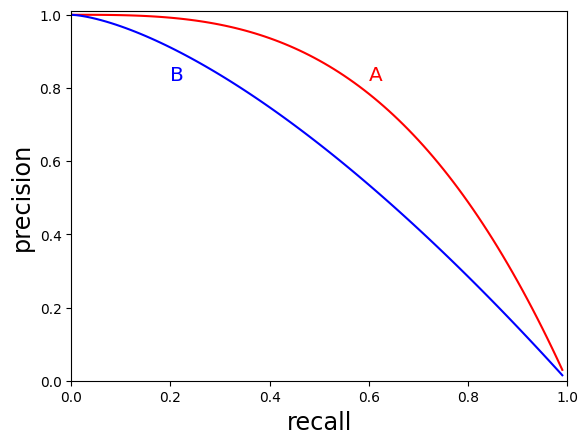

In [1]:
import numpy as np; import matplotlib.pyplot as plt
fA = np.vectorize(lambda x: 1 - x**3); fB = np.vectorize(lambda x: 1 - x**(3/2)); x = np.arange(0, 1, 0.01)
plt.figure(figsize=(5,3)); plt.axis([0, 1, 0, 1.01])
plt.plot(x, fA(x), 'r-'); plt.plot(x, fB(x), 'b-')
plt.text(0.6, 0.82, 'A', color='red', size='x-large')
plt.text(0.2, 0.82, 'B', color='blue', size='x-large')
plt.xlabel('recall', size='xx-large'); plt.ylabel('precision', size='xx-large');





En el extremo más optimista, un clasificador "perfecto", de probabilidades $1$ para muestras positivas y $0$ para negativas, exhibirá una curva PR horizontal de precisión máxima salvo en $\tau=1$ (recall $1$), donde caerá abruptamente a precisión $P/M$.

## Resumen mediante un escalar

Al igual que una curva ROC, la calidad de una curva PR suele resumirse mediante alguna medida escalar para facilitar su comparación con otras curvas. Una medida usual es la precisión a un nivel de cobertura dado; en particular, la **precisión a $K$** se calcula con las $K$ muestras de mayor probabilidad. Otra medida usual el área bajo la curva PR o **average precision (AP)**, en todo el dominio de cobertura o hasta un nivel dado. Con el fin de evitar oscilaciones no mónotonas de la curva PR, la precisión a un nivel de cobertura dado se suele sustituir por la **precisión interpolada** o precisión máxima alcanzada con dicho nivel o mayor. Así, la **AP interpolada** denota el área bajo la **curva PR interpolada.** Por último, en problemas de $C$ clases abordados como $C$ problemas binarios, las $C$ curvas PR (interpoladas) correspondientes se suelen promediar para obtener un curva PR media a partir de la cual se calcula la **mean average precision (mAP).** 

## Clases desequilibradas

A diferencia de las curvas ROC, las curvas PR sí son sensibles al desequilibrio de clases. Consideremos el ratio de positivos a negativos en función de la fracción de positivos, $\pi=P/M$:
$$r=\frac{P}{N}=\frac{\pi}{1-\pi}$$
La precisión puede expresarse en función de $r$ como:
$$\mathcal{P}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FP}_{\tau}}%
=\frac{P\cdot\operatorname{TPR}_{\tau}}{P\cdot\operatorname{TPR}_{\tau}+N\cdot\operatorname{FPR}_{\tau}}%
=\frac{\operatorname{TPR}_{\tau}}{\operatorname{TPR}_{\tau}+\frac{1}{r}\cdot\operatorname{FPR}_{\tau}}$$
Claramente, $\;\lim\limits_{r\to\infty}\mathcal{P}(\tau)=1\;$ y $\;\lim\limits_{r\to 0}\mathcal{P}(\tau)=0$.